In [21]:
from control import *
import numpy as np
import matplotlib.pyplot as plt
wn=1*np.pi*2
Q=50
pendulum=tf([wn**2],[1,wn/Q,wn**2])
wn=0.5*np.pi*2
multiple=pendulum*tf([wn**2],[1,wn/Q,wn**2])
wn=0.2*np.pi*2
multiple*=tf([wn**2],[1,wn/Q,wn**2])
wn=0.08*np.pi*2
multiple*=tf([wn**2],[1,wn/Q,wn**2])
f=np.linspace(0.01,10,100000)

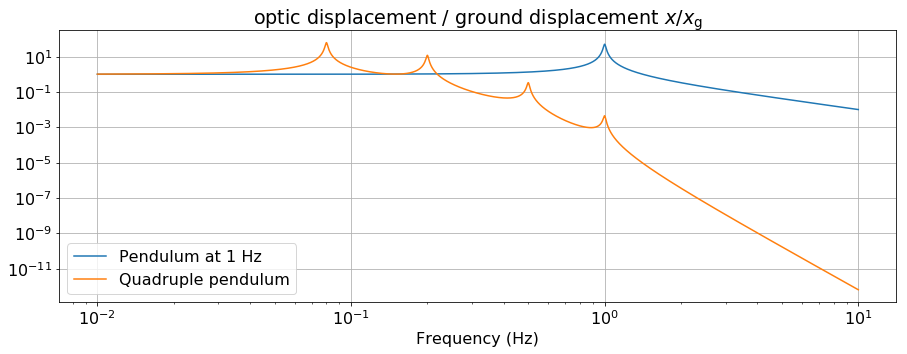

In [31]:
plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 16})
plt.loglog(f, abs(pendulum.horner(2*np.pi*1j*f)[0][0]), label='Pendulum at 1 Hz')
plt.loglog(f, abs(multiple.horner(2*np.pi*1j*f)[0][0]), label='Quadruple pendulum')
plt.title(r'optic displacement / ground displacement ${x}/{x_\mathrm{g}}$')
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.legend(loc=0)

Text(0.5,0,'Frequency (Hz)')

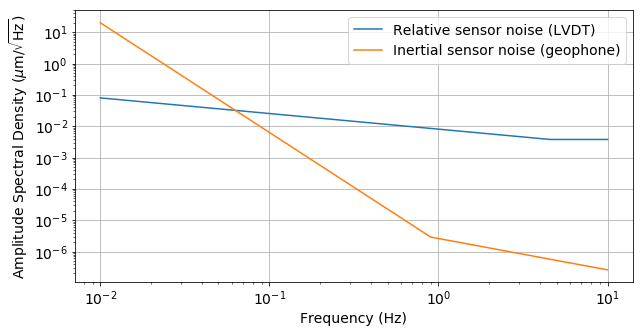

In [42]:
from kontrol.model import *
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 14})
f=np.linspace(0.01,10,1000)
plt.loglog(f, lvdt_noise(f, 8e-3, 4.5), label = 'Relative sensor noise (LVDT)')
plt.loglog(f, geophone_noise(f, 2e-6, 0.9), label='Inertial sensor noise (geophone)')
plt.grid()
plt.legend(loc=0)
plt.ylabel('Amplitude Spectral Density ($\mu\mathrm{m}/\sqrt{\mathrm{Hz}}$)')
plt.xlabel('Frequency (Hz)')

In [93]:
import kontrol.core.transfer_function
import importlib
importlib.reload(kontrol.core.transfer_function)

<module 'kontrol.core.transfer_function' from '/home/terrencetec/.conda/envs/kontrol/lib/python3.8/site-packages/kontrol/core/transfer_function.py'>

In [103]:
tf = kontrol.core.transfer_function.TransferFunction([1,2,3], [3,4,5])

In [104]:

# tf.expression = ''
tf.foton

'zpk([0.15915494309189535+0.22507907903927651j;0.15915494309189535-0.22507907903927651j],[0.10610329539459687+0.175952409922061j;0.10610329539459687-0.175952409922061j],0.6,"n")'

In [96]:
tf.pole()

array([-0.66666667+1.1055416j, -0.66666667-1.1055416j])

In [36]:
tf.zero()/2/np.pi

array([-0.31830989])

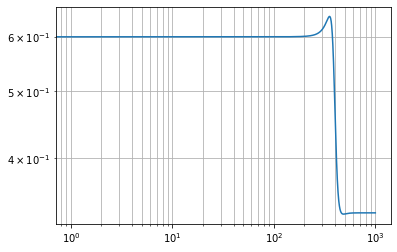

In [102]:
import matplotlib.pyplot as plt
import numpy as np
f = np.logspace(-3,3, 1000)
plt.loglog(abs(tf.horner(2*np.pi*1j*f)[0][0]))
plt.grid(which='both')

In [101]:
?plt.grid

In [60]:
abs(tf.horner(2*np.pi*1j*f)[0][0])

array([0.49999692, 0.49999458, 0.49999047, 0.49998326, 0.49997058,
       0.4999483 , 0.49990916, 0.49984041, 0.49971973, 0.49950807,
       0.49913742, 0.49849012, 0.49736504, 0.49542557, 0.49212915,
       0.48665841, 0.47792738, 0.46482168, 0.4468403 , 0.42496124,
       0.40188599, 0.38092763, 0.36432799, 0.35256173, 0.3448703 ,
       0.34010864, 0.33726037, 0.3355918 , 0.33462629, 0.3340716 ,
       0.33375424, 0.3335731 , 0.33346984, 0.33341104, 0.33337755,
       0.3333585 , 0.33334765, 0.33334148, 0.33333797, 0.33333597,
       0.33333483, 0.33333419, 0.33333382, 0.33333361, 0.33333349,
       0.33333342, 0.33333338, 0.33333336, 0.33333335, 0.33333334])

In [73]:
abc = '123'
abc.rstrip('3')


'12'

In [106]:
import kontrol.model.fit

In [180]:
f = np.linspace(0,1000,100000)
ff = np.linspace(0,10,1000)
f = f[1:]
ff = ff[1:]
w_v = kontrol.model.fit.vinagre_weight(omega=f)
w_v_ff = kontrol.model.fit.vinagre_weight(omega=ff)
w_f = np.log10(1/f)-min(np.log10(1/f))
w_f /= max(w_f)

9 -1
89 0
899 1
8999 2
89998 3


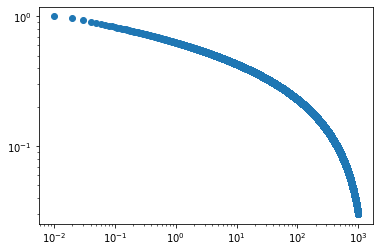

In [181]:
plt.loglog(f, w_v, 'o')
counter=0
order = -1
for fff in f:
    if np.log10(fff) < order:
        counter+=1
    else:
        print(counter, order)
        counter=0
        order+=1

In [166]:
list(f).index(1.001001001001001)

99

In [169]:
w_v[0]

49.95

In [171]:
f[0]

0.01001001001001001

In [168]:
w_v[99]

0.009990000000000051

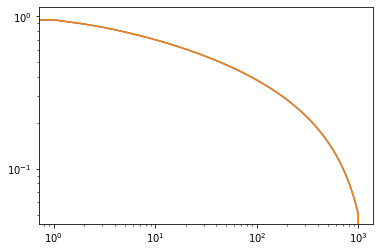

In [175]:
plt.loglog(w_v)
plt.loglog(w_v_ff)

In [135]:
w_v

array([1.        , 0.94982107, 0.89111548, 0.8494632 , 0.81715518,
       0.79075761, 0.76843878, 0.74910533, 0.73205202, 0.71679731,
       0.70299775, 0.69039974, 0.67881069, 0.66808091, 0.65809173,
       0.64874746, 0.63996988, 0.63169415, 0.62386599, 0.61643945,
       0.60937532, 0.60263989, 0.5962039 , 0.59004187, 0.58413143,
       0.57845283, 0.57298856, 0.56772305, 0.56264232, 0.55773386,
       0.55298636, 0.5483896 , 0.5439343 , 0.53961201, 0.53541503,
       0.53133629, 0.5273693 , 0.52350812, 0.51974724, 0.51608158,
       0.51250644, 0.50901746, 0.50561057, 0.50228202, 0.49902827,
       0.49584604, 0.49273224, 0.48968401, 0.48669863, 0.48377356,
       0.48090642, 0.47809496, 0.47533705, 0.4726307 , 0.469974  ,
       0.46736518, 0.46480253, 0.46228445, 0.45980942, 0.45737599,
       0.45498278, 0.45262849, 0.45031187, 0.44803173, 0.44578694,
       0.44357643, 0.44139916, 0.43925414, 0.43714045, 0.43505716,
       0.43300343, 0.43097842, 0.42898134, 0.42701144, 0.42506

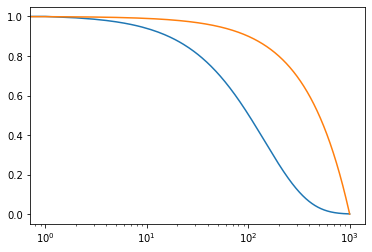

In [155]:
plt.semilogx(w_v)
plt.semilogx(w_f)

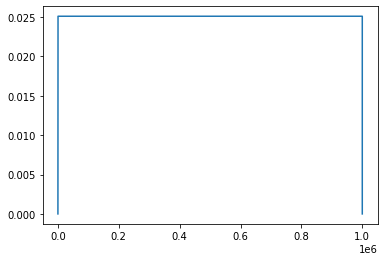

In [143]:
plt.plot(w_v-w_f)
# plt.plot(w_f)